- Introduction
Prediksi status pesanan mengunakan machine learning klasifikasi

- Manfaat machine learning ini untuk bisnis
1.Meningkatkan pelayanan kepada pelanggan dengan meminimalisir komplain pelanggan akibat dari permasalahan pengiriman
2.Bisa menjadi dasar reward dan penalty untuk cabang usaha

1.Data Understanding

In [69]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
# Read dataset
orders = pd.read_csv('order_history_kaggle_data.csv')
orders.head()

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [98]:
# Insert data into MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['orders_db']
collection = db['orders_data']

data_dict = orders.to_dict(orient='records')
collection.insert_many(data_dict)
print(f"Inserted {len(data_dict)} records into MongoDB.")

Inserted 21321 records into MongoDB.


In [99]:
# Get data from MongoDB
data = pd.DataFrame(list(collection.find()))

# Drop column id if exists
if '_id' in data.columns:
    data.drop(columns=['_id'], inplace=True)

data.head()


,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


In [73]:
# Shape
print("Jumlah baris dan kolom:", data.shape)

# Data type per column
print("\nTipe data:")
print(data.dtypes)

# Statistics deskripti
print("\nStatistik deskriptif:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check for duplicates values
print("\nJumlah Duplicate:", data.duplicated().sum())


Jumlah baris dan kolom: (21321, 29)

Tipe data:
Restaurant ID                                           int64
Restaurant name                                        object
Subzone                                                object
City                                                   object
Order ID                                                int64
Order Placed At                                        object
Order Status                                           object
Delivery                                               object
Distance                                               object
Items in order                                         object
Instructions                                           object
Discount construct                                     object
Bill subtotal                                         float64
Packaging charges                                     float64
Restaurant discount (Promo)                           float64
Restaurant discount (F

2.Data Cleaning

In [100]:
# Drop column if not needed
data.drop(["Restaurant ID", "Restaurant name", "Subzone", "City", "Order ID", 
           "Delivery", "Items in order", "Instructions", "Discount construct",
           "Bill subtotal","Packaging charges", "Restaurant discount (Flat offs, Freebies & others)",
           "Gold discount", "Brand pack discount", "Rating", "Review", 
           "Cancellation / Rejection reason","Restaurant compensation (Cancellation)", 
           "Restaurant penalty (Rejection)", "Order Ready Marked", "Customer complaint tag",
           'Customer ID'], axis=1, inplace=True)

- Variabel Independen (Memengarui)
1.Distance / Jarak -> Jarak yang terlalu jauh bisa meningkatkan kemungkinan order delay atau cancel
2.KPT duration (minutes) / Waktu persiapan -> Semakin lama waktu persiapan, semakin besar kemungkinan pelanggan membatalkan pesanan
3.Raider wait time (minutes) / Waktu tunggu kurir -> Waktu tunggu yang lama bisa berdampak ke keterlambatan pengantaran, memicu keluhan atau cancel pesanan.
4.Total -> Nilai transaksi biasanya lebih diperhatikan pelanggan, kemungkinan bisa memengaruhi ketidak puasan dan terjadi cancel pesanan.
5.Diskon -> Diskon kemungkinan bisa meredam atau mengurangi ketidakpuasaan pelanggan dari keterlambatan pengiriman dan menngurangi potensi cancel pesanan.
6.Order placed at / Tanggal dan Waktu pesanan -> berpotensi memengaruhi status pesanan karena terdapat tanggal atau waktu yang bisa jadi sedang tidak melayani pesanan.

- Variabel Dependen (Dipengaruhi)
1.Order status / Status pesanan -> Target dari klasifikasi, dimana model akan mempelajari pola dari fitur lain terhadap variabel ini.

In [75]:
# Fixing missing values
data['KPT duration (minutes)'].fillna(data['KPT duration (minutes)'].median(), inplace=True)
data['Rider wait time (minutes)'].fillna(data['Rider wait time (minutes)'].median(), inplace=True)

# Check for missing values again
print("\nMissing values setelah ditangangi:")
data.isnull().sum()


Missing values setelah ditangangi:


C:\Users\usER\AppData\Local\Temp\ipykernel_21616\3119710681.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['KPT duration (minutes)'].fillna(data['KPT duration (minutes)'].median(), inplace=True)
C:\Users\usER\AppData\Local\Temp\ipykernel_21616\3119710681.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

Order Placed At                0
Order Status                   0
Distance                       0
Restaurant discount (Promo)    0
Total                          0
KPT duration (minutes)         0
Rider wait time (minutes)      0
dtype: int64

   Distance  KPT duration (minutes)  Rider wait time (minutes)  \
0       3.0                   18.35                       11.6   
1       2.0                   16.95                        3.6   
2       0.5                   14.05                       12.2   
3       2.0                   19.00                        3.3   
4       2.0                   15.97                        1.0   

   Restaurant discount (Promo)    Total  
0                         80.0   666.75  
1                        175.0  1054.20  
2                         80.0   241.50  
3                         80.0   567.00  
4                         80.0   529.20  


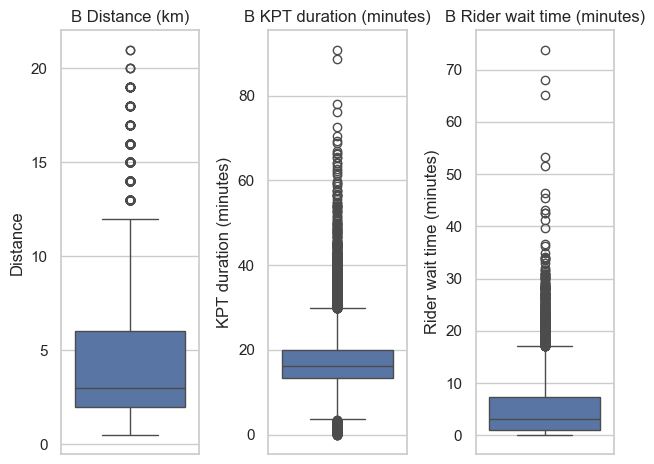

In [81]:
def clean_distance(val):
    val = str(val).replace('km', '')

    if '<' in val:
        return 0.5
    
    try:
        return float(val)
    except:
        return None
    
data['Distance'] = data['Distance'].apply(clean_distance)
data['Distance'] = data['Distance'].astype(float)

# Check result cleaning
print(data[['Distance', 'KPT duration (minutes)', 'Rider wait time (minutes)', 'Restaurant discount (Promo)', 'Total']].head())

# Plot boxplot for outlier detection

# Set style seaborn
sns.set(style="whitegrid")

# Create figure
plt.Figure(figsize=(16, 5))

# Boxplot distance
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Distance'])
plt.title('B Distance (km)')

# Boxplot KPT duration (minutes)
plt.subplot(1, 3, 2)
sns.boxplot(y=data['KPT duration (minutes)'])
plt.title('B KPT duration (minutes)')

# Boxplot Rider wait time (minutes)
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Rider wait time (minutes)'])
plt.title('B Rider wait time (minutes)')

# Show plot
plt.tight_layout()
plt.show()

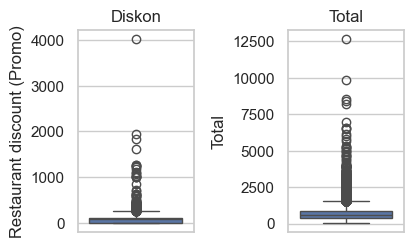

In [82]:
# Boxplot discount
plt.subplot(2, 3, 1)
sns.boxplot(y=data['Restaurant discount (Promo)'])
plt.title('Diskon')

# Boxplot total
plt.subplot(2, 3, 2)
sns.boxplot(y=data['Total'])
plt.title('Total')


# Show plot
plt.tight_layout()
plt.show()

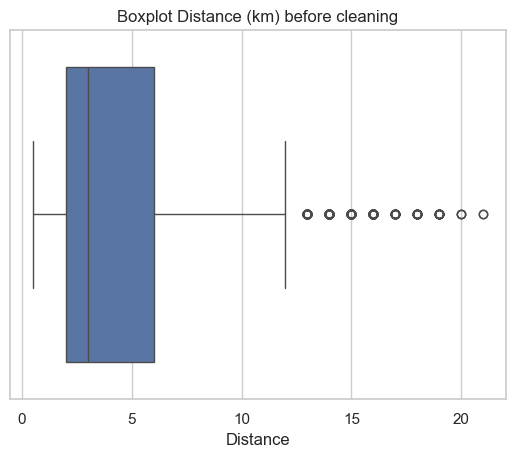

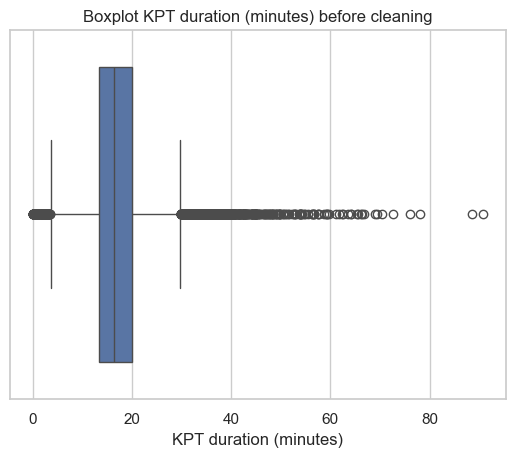

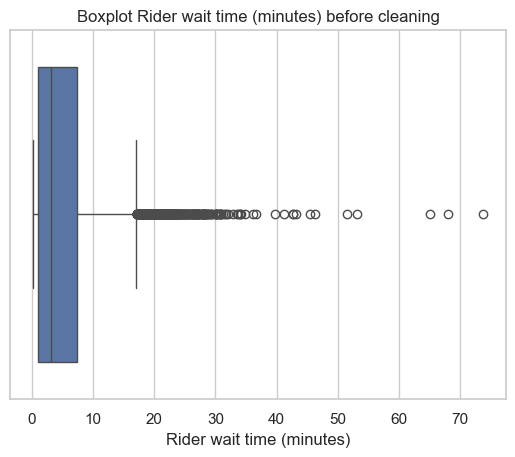

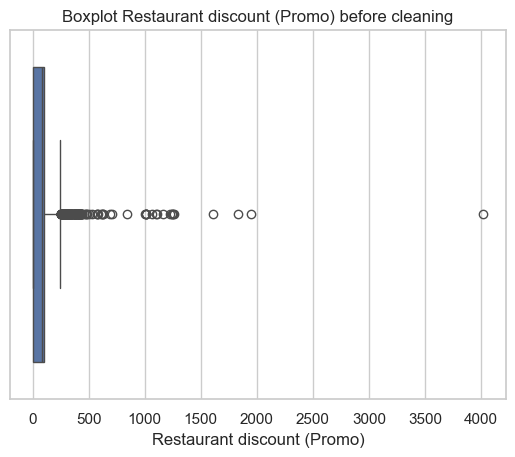

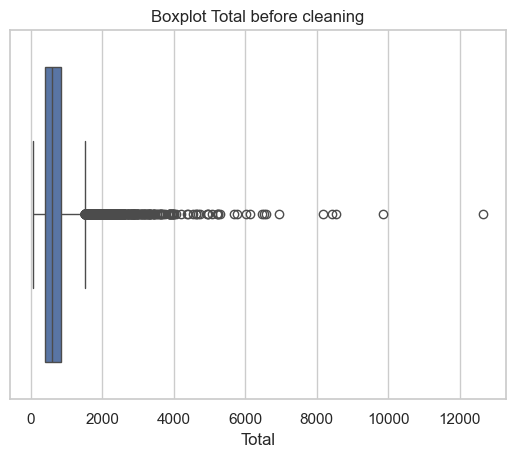

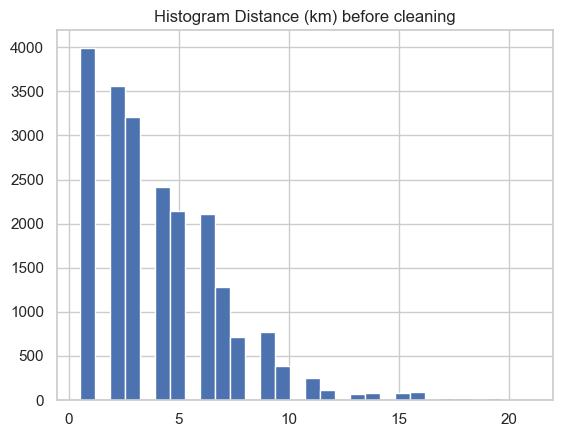

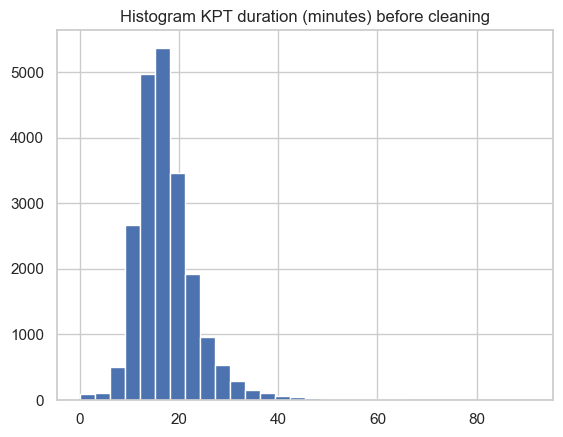

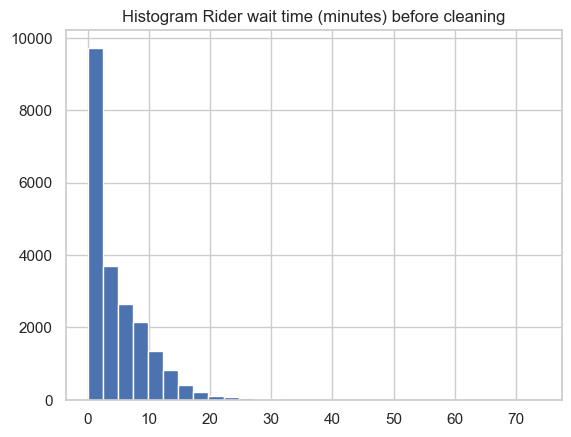

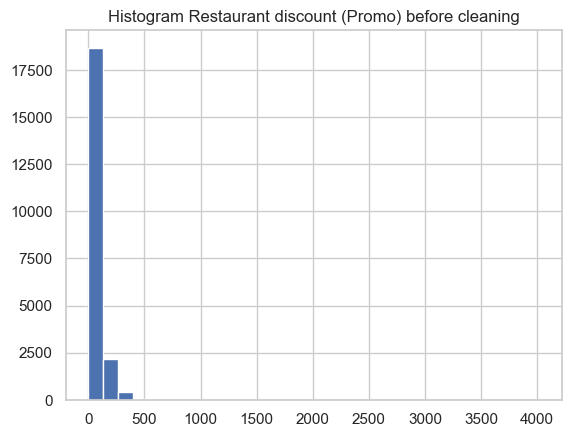

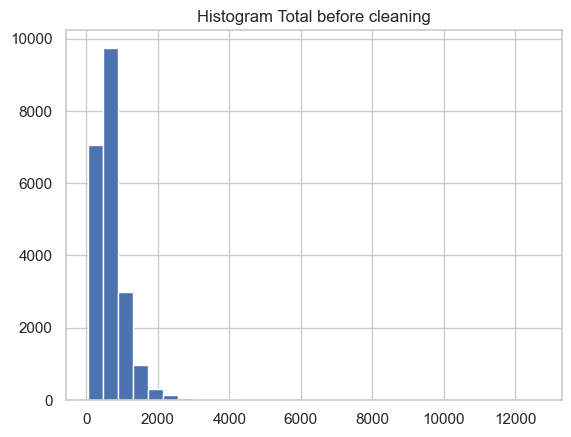

In [83]:
# Check distribution

# Boxplot before cleaning

# Distance (km)
sns.boxplot(x=data['Distance'])
plt.title('Boxplot Distance (km) before cleaning')
plt.show()

# KPT duration (minutes)
sns.boxplot(x=data['KPT duration (minutes)'])
plt.title('Boxplot KPT duration (minutes) before cleaning')
plt.show()

# Rider wait time (minutes)
sns.boxplot(x=data['Rider wait time (minutes)'])
plt.title('Boxplot Rider wait time (minutes) before cleaning')
plt.show()

# Discount
sns.boxplot(x=data['Restaurant discount (Promo)'])
plt.title('Boxplot Restaurant discount (Promo) before cleaning')
plt.show()

# Total
sns.boxplot(x=data['Total'])
plt.title('Boxplot Total before cleaning')
plt.show()

# Histogram before cleaning

# Distance (km)
plt.hist(data['Distance'], bins=30)
plt.title('Histogram Distance (km) before cleaning')
plt.show()

# KPT duration (minutes)
plt.hist(data['KPT duration (minutes)'], bins=30)
plt.title('Histogram KPT duration (minutes) before cleaning')
plt.show()

# Rider wait time (minutes)
plt.hist(data['Rider wait time (minutes)'], bins=30)
plt.title('Histogram Rider wait time (minutes) before cleaning')
plt.show()

# Discount
plt.hist(data['Restaurant discount (Promo)'], bins=30)
plt.title('Histogram Restaurant discount (Promo) before cleaning')
plt.show()

# Total
plt.hist(data['Total'], bins=30)
plt.title('Histogram Total before cleaning')
plt.show()

In [84]:
# Function untuk ambil lower & upper bound sekali di awal
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Copy data
clean_data = data.copy()

# Ambil IQR boundaries sekali saja di awal
dist_lower, dist_upper = get_iqr_bounds(clean_data, 'Distance')
kpt_lower, kpt_upper = get_iqr_bounds(clean_data, 'KPT duration (minutes)')
wait_lower, wait_upper = get_iqr_bounds(clean_data, 'Rider wait time (minutes)')
discount_lower, discount_upper = get_iqr_bounds(clean_data, 'Restaurant discount (Promo)')
total_lower, total_upper = get_iqr_bounds(clean_data, 'Total')

# Hapus data outlier berdasarkan batas awal
clean_data = clean_data[
    (clean_data['Distance'] >= dist_lower) & (clean_data['Distance'] <= dist_upper) &
    (clean_data['KPT duration (minutes)'] >= kpt_lower) & (clean_data['KPT duration (minutes)'] <= kpt_upper) &
    (clean_data['Rider wait time (minutes)'] >= wait_lower) & (clean_data['Rider wait time (minutes)'] <= wait_upper) &
    (clean_data['Restaurant discount (Promo)'] >= discount_lower) & (clean_data['Restaurant discount (Promo)'] <= discount_upper) &
    (clean_data['Total'] >= total_lower) & (clean_data['Total'] <= total_upper)
]

# Cek hasilnya
def count_outliers(df, column, lower_bound, upper_bound):
    return len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

print(f"Jumlah outliers Distance setelah: {count_outliers(clean_data, 'Distance', dist_lower, dist_upper)}")
print(f"Jumlah outliers KPT duration (minutes) setelah: {count_outliers(clean_data, 'KPT duration (minutes)', kpt_lower, kpt_upper)}")
print(f"Jumlah outliers Rider wait time (minutes) setelah: {count_outliers(clean_data, 'Rider wait time (minutes)', wait_lower, wait_upper)}")
print(f"Jumlah outliers Restaurant discount (Promo) setelah: {count_outliers(clean_data, 'Restaurant discount (Promo)', discount_lower, discount_upper)}")
print(f"Jumlah outliers Total setelah: {count_outliers(clean_data, 'Total', total_lower, total_upper)}")


Jumlah outliers Distance setelah: 0
Jumlah outliers KPT duration (minutes) setelah: 0
Jumlah outliers Rider wait time (minutes) setelah: 0
Jumlah outliers Restaurant discount (Promo) setelah: 0
Jumlah outliers Total setelah: 0


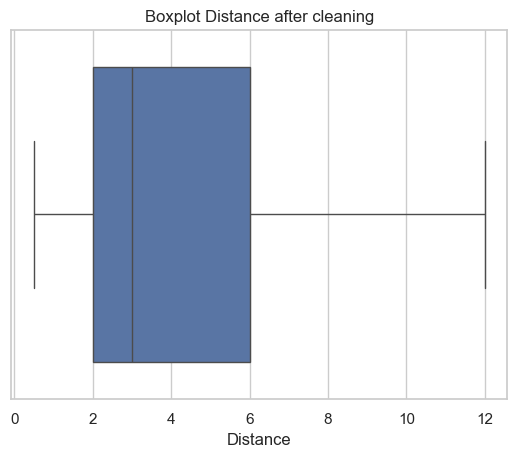

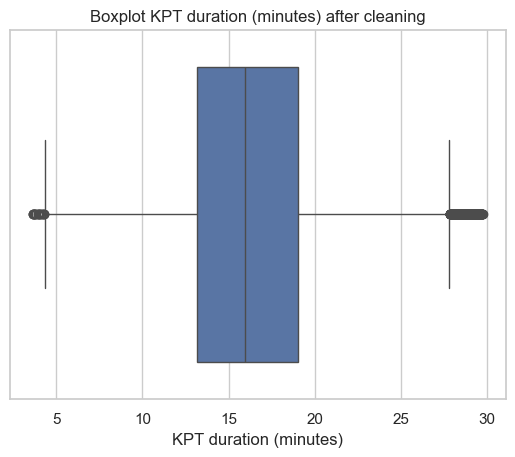

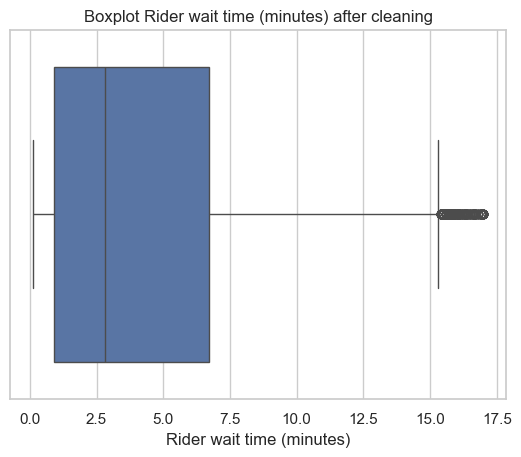

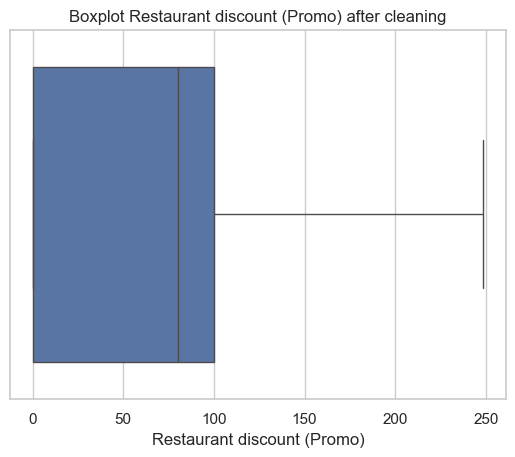

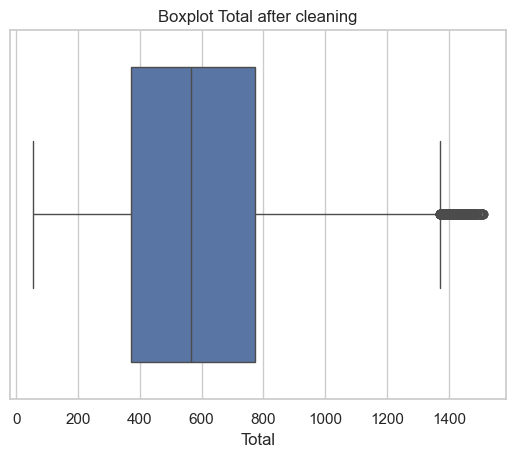

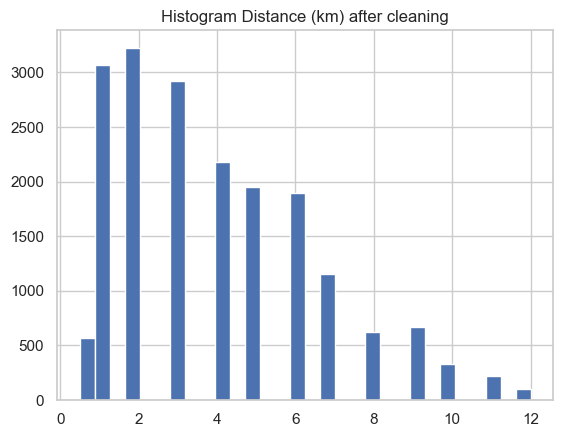

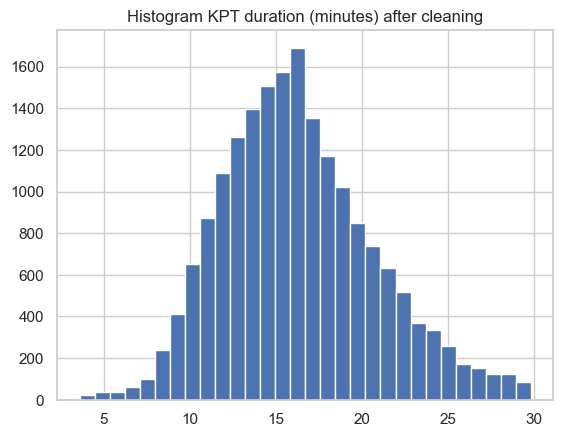

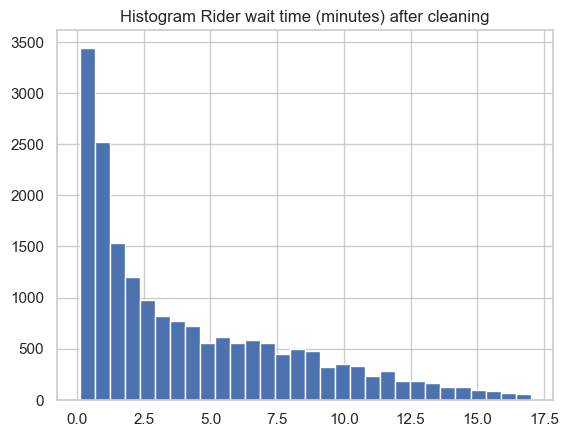

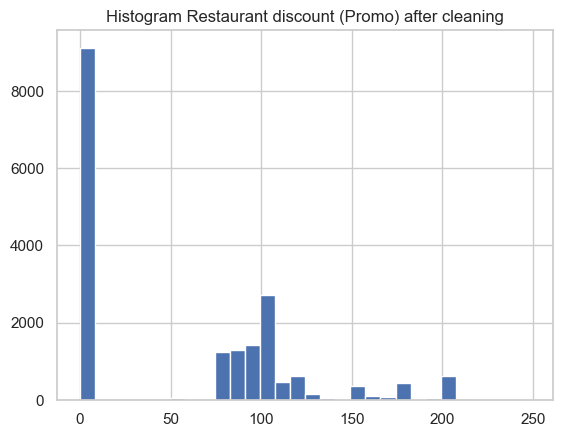

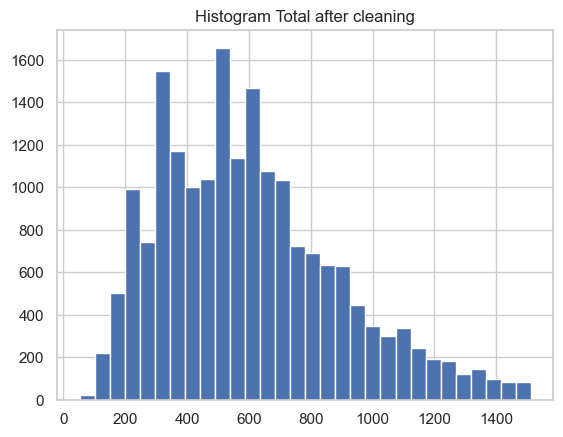

In [87]:
# Check distribution in column

# Boxplot after cleaning

# Distance (km)
sns.boxplot(x=clean_data['Distance'])
plt.title('Boxplot Distance after cleaning')
plt.show()

# KPT duration (minutes)
sns.boxplot(x=clean_data['KPT duration (minutes)'])
plt.title('Boxplot KPT duration (minutes) after cleaning')
plt.show()

# Rider wait time (minutes)
sns.boxplot(x=clean_data['Rider wait time (minutes)'])
plt.title('Boxplot Rider wait time (minutes) after cleaning')
plt.show()

# Discount
sns.boxplot(x=clean_data['Restaurant discount (Promo)'])
plt.title('Boxplot Restaurant discount (Promo) after cleaning')
plt.show()

# Total
sns.boxplot(x=clean_data['Total'])
plt.title('Boxplot Total after cleaning')
plt.show()

# Histogram after cleaning

# Distance (km)
plt.hist(clean_data['Distance'], bins=30)
plt.title('Histogram Distance (km) after cleaning')
plt.show()

# KPT duration (minutes)
plt.hist(clean_data['KPT duration (minutes)'], bins=30)
plt.title('Histogram KPT duration (minutes) after cleaning')
plt.show()

# Rider wait time (minutes)
plt.hist(clean_data['Rider wait time (minutes)'], bins=30)
plt.title('Histogram Rider wait time (minutes) after cleaning')
plt.show()

# Discount
plt.hist(clean_data['Restaurant discount (Promo)'], bins=30)
plt.title('Histogram Restaurant discount (Promo) after cleaning')
plt.show()

# Total
plt.hist(clean_data['Total'], bins=30)
plt.title('Histogram Total after cleaning')
plt.show()

In [101]:
# Encode variabel Order Placed At
clean_data['Order Placed At'] = pd.to_datetime(clean_data['Order Placed At'])

# Extract menjadi order hour
clean_data['Order Hour'] = clean_data['Order Placed At'].dt.hour

# Buat is peak hour
def is_peak_hour(hour):
    return 1 if (12 <= hour <= 13) or (18 <= hour <= 19) else 0

clean_data['Is Peak Hour'] = clean_data['Order Hour'].apply(is_peak_hour)

# Buat is weekend
clean_data['Is Weekend'] = clean_data['Order Placed At'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Keep status order status hanya delivered dan rejected
clean_data = clean_data[clean_data['Order Status'].isin(['Delivered', 'Rejected'])]

# Encoding variabel Order Status
clean_data['Order Status'] = clean_data['Order Status'].replace({'Delivered', 'Rejected'})

status_mapping = {'Delivered': 1, 'Rejected': 0}
clean_data['Order Status'] = clean_data['Order Status'].map(status_mapping)


# Menyiapkan feature dan target
features = ['Order Hour', 'Is Peak Hour', 'Is Weekend', 'Distance',
           'KPT duration (minutes)', 'Rider wait time (minutes)', 
           'Restaurant discount (Promo)', 'Total']

# X = data fitur, Y = data target
X = clean_data[features]
y = clean_data['Order Status']

C:\Users\usER\AppData\Local\Temp\ipykernel_21616\3939356884.py:20: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  clean_data['Order Status'] = clean_data['Order Status'].replace({'Delivered', 'Rejected'})


In [102]:
# Split data menjadi train dan test
from sklearn.model_selection import train_test_split

# 80% data untuk training, 20% untuk testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Normalisasi fitur
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training menggunakan SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prediksi data test
y_pred = svm_model.predict(X_test_scaled)


In [95]:
print(clean_data['Order Status'].value_counts())

Series([], Name: count, dtype: int64)
